In [18]:
import mahotas as mh
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline

file = 'materials/nuclear_DNA.tif'

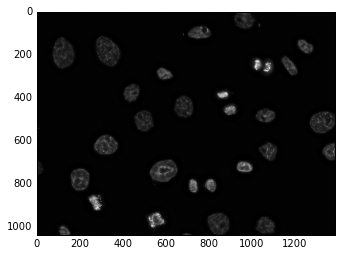

In [23]:
original_image = io.imread(file)
plt.imshow(original_image, cmap = 'gray')

In [24]:
def measureNuclearSize(file):

	max_size = 10000
	min_size = 100
	image = io.imread(file)

	# Gaussian filteringn and thresholding to make binary image
	imagef = mh.gaussian_filter(image, 4)
	imagef = (image > image.mean())

	#Labeling all the nuclei in the image
	labeled, numberOfNuclei = mh.label(imagef)

	#Remove congregated nuclei and micronuclei
	sizes = mh.labeled.labeled_size(labeled)
	too_big = np.where(sizes > 10000)
	labeled = mh.labeled.remove_regions(labeled, too_big)
	too_small = np.where(sizes < 1000)
	labeled = mh.labeled.remove_regions(labeled, too_small)

	# Remove cells at the borders
	labeled = mh.labeled.remove_bordering(labeled)

	# Relabel everthing
	relabeled, n_final = mh.labeled.relabel(labeled)

	# Labeling the nuclei whose size is between min and max size and not at the borders
	# relabeled, numberOfNuclei = mh.labeled.filter_labeled(labeled, remove_bordering = True, max_size = max_size, min_size = min_size)

	# Nuclear size
	sizes = mh.labeled.labeled_size(relabeled)

	plt.imshow(relabeled)
	print(sizes[1:])
	plt.show()

[5735 4184 4600 7525 3675 5405 3077 7683 3320 5216 7401 9054 5711 4280 8444
 3289 3065 4806 6003 6159]


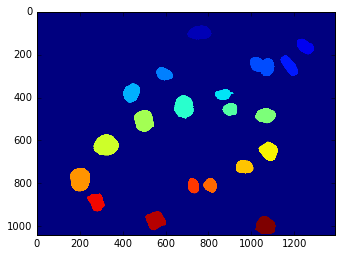

In [25]:
measureNuclearSize(file)